This article is a bonus. The difference with the previous one is that I use a binary classification problem, instead of a regression problem. Recall that the main difference lies on the use of different loss function and the use of activation function. Anyway, if you're already familiar, you can skip it.

# Binary Classification Problem

The goal of the binary classification problem is to determine if a set of data belongs to a particular group or not. To this end, we can use a set of 2D sample data for our illustration. 

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
center_point_group0 = [-1.,0.]
center_point_group1 = [1.,0.]

data,which_group_label = datasets.make_blobs(
    n_samples=100,
    centers=[center_point_group0,center_point_group1],
    cluster_std=0.3,
) 

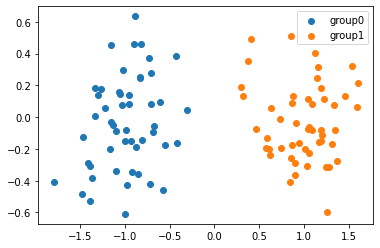

In [3]:
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group1')
plt.legend()

It is clear that the optimal decision boundary is at $x=0$.

# Single-Layer Perceptron

Let's use a single perceptron for the classification problem as it is the baby version of DNN. We'll follow the usual steps to train a model, i.e., define a model class. 

In [4]:
import torch
import torch.nn as nn

class SLP(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size,out_features=output_size)
        
    def forward(self,x):
        prediction = torch.sigmoid(self.linear(x)) # don't forget the activation function here
        return prediction
        


In [5]:
model = SLP(2,1) # 2 as in 2D input, and 1 as in single output of the single layer perceptron

data_tensor = torch.tensor(data,dtype=torch.float)
label = torch.tensor(which_group_label,dtype=torch.float).view(-1,1)

loss_fun = nn.BCELoss() # BCE: binary cross entropy
optimizer = torch.optim.SGD(params=model.parameters(),lr=1e-2)


See the current situation, the boundary might be totally wrong.

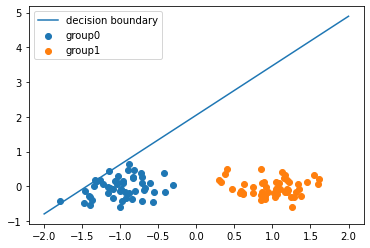

In [6]:
w = model.linear.weight[0].detach().numpy()
b = model.linear.bias[0].detach().numpy()

x = np.linspace(-2,2,10)
y = (-1/w[1])*(w[0]*x+b)

plt.plot(x,y,label='decision boundary')
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group1')
plt.legend()

In [7]:
num_epochs = 10000
losses = []

for i in range(num_epochs):
    pred = model.forward(data_tensor)
    loss = loss_fun(pred,label)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Text(0, 0.5, 'error')

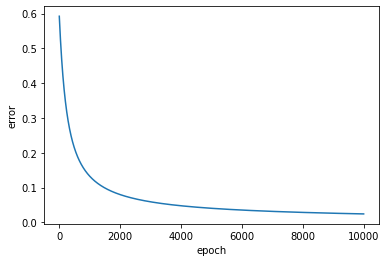

In [8]:

plt.plot(np.arange(num_epochs),losses)
plt.xlabel('epoch')
plt.ylabel('error')

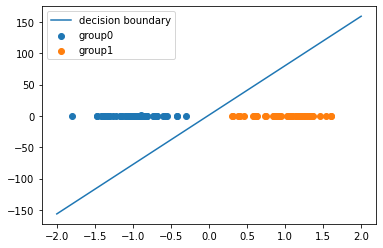

In [9]:
w_opt = model.linear.weight[0].detach().numpy()
b_opt = model.linear.bias[0].detach().numpy()

x = np.linspace(-2,2,10)
y = (-1/w_opt[1])*(w_opt[0]*x+b_opt)

plt.plot(x,y,label='decision boundary')
plt.scatter(data[which_group_label==0,0],data[which_group_label==0,1],label='group0')
plt.scatter(data[which_group_label==1,0],data[which_group_label==1,1],label='group1')
plt.legend()

Even though the decision boundary is far from what we expected, which is $x=0$, but it works pretty good. :D 

Upon discussing the baby of DNN, next article will discuss DNN in PyTorch.